## Use of Dropout and Batch Normalization in 2D CNN on Dog Cat Image Classification in TensorFlow 2.0

##### Watch Full Video Here: https://youtu.be/Tj8ftPf2jsQ

## What is Dropout

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

![alt text](http://perso.mines-paristech.fr/fabien.moutarde/ES_MachineLearning/TP_convNets/drop.png)

# What is Batch Normalization

![alt text](https://miro.medium.com/max/935/1*4T4y3kI0R9Alk_2pe6B4Pg.png)

![alt text](https://miro.medium.com/max/886/1*WRio7MD4JDeLww-CyrxEbg.png)

Normalization brings all the inputs centered around 0. This way, there is not much change in each layer input. So, layers in the network can learn from the back-propagation simultaneously, without waiting for the previous layer to learn. This fastens up the training of networks.

<img src = "https://miro.medium.com/max/3840/1*oB3S5yHHhvougJkPXuc8og.gif">

# VGG16 Model

![alt text](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)


## Download Data from GitHub and Model Building

In [2]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 37kB/s 
     |████████████████████████████████| 4.3MB 41.4MB/s 
     |████████████████████████████████| 501kB 45.8MB/s 


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Counting objects: 100% (25027/25027), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 25027 (delta 5), reused 25020 (delta 3), pack-reused 0
Receiving objects: 100% (25027/25027), 541.62 MiB | 46.28 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_width = 32
img_height = 32
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (img_width, img_height),
                                              classes = ['dogs', 'cats'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [10]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
validation_generator = datagen.flow_from_directory(directory=valid_data_dir,
                                                   target_size = (32, 32),
                                                   classes = ['dogs', 'cats'],
                                                   class_mode = 'binary',
                                                   batch_size = batch_size)

Found 5000 images belonging to 2 classes.


In [13]:
len(train_generator)*batch_size

20000

## Build CNN Base Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

W0901 13:51:39.748481 139658687932288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
1000/1000 [==============================] - 111s 111ms/step - loss: 0.6962 - accuracy: 0.5070 - val_loss: 0.6881 - val_accuracy: 0.5230
Epoch 2/5
1000/1000 [==============================] - 110s 110ms/step - loss: 0.6888 - accuracy: 0.5189 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 110s 110ms/step - loss: 0.6845 - accuracy: 0.5365 - val_loss: 0.6681 - val_accuracy: 0.5962
Epoch 4/5
1000/1000 [==============================] - 110s 110ms/step - loss: 0.6600 - accuracy: 0.5978 - val_loss: 0.6202 - val_accuracy: 0.6632
Epoch 5/5
1000/1000 [==============================] - 116s 116ms/step - loss: 0.5837 - accuracy: 0.6940 - val_loss: 0.5716 - val_accuracy: 0.7042


In [17]:
history.history

{'accuracy': [0.507, 0.51895, 0.5365, 0.5978, 0.694],
 'loss': [0.69620611089468,
  0.6887871057987213,
  0.6845460216999054,
  0.6599816603958607,
  0.5836829554438591],
 'val_accuracy': [0.523, 0.5, 0.5962, 0.6632, 0.7042],
 'val_loss': [0.6880843338966369,
  0.6940324778556823,
  0.6681328535079956,
  0.620159299492836,
  0.5715878279209137]}

In [0]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, 6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

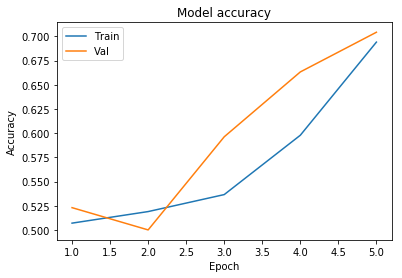

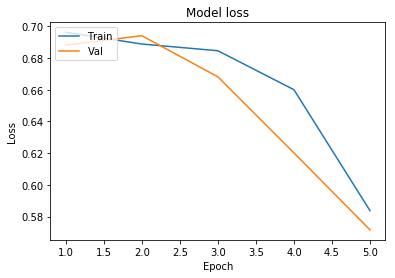

In [19]:
plot_learningCurve(history)

## Impliment First 3 Blocks of VGG16 Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 213s 213ms/step - loss: 0.7063 - accuracy: 0.4947 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 212s 212ms/step - loss: 0.6934 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 213s 213ms/step - loss: 0.6936 - accuracy: 0.4927 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 212s 212ms/step - loss: 0.6935 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 215s 215ms/step - loss: 0.6935 - accuracy: 0.5007 - val_loss: 0.6937 - val_accuracy: 0.5000


## Batch Normalization and Dropout

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 10, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 354s 354ms/step - loss: 0.6662 - accuracy: 0.6121 - val_loss: 0.6016 - val_accuracy: 0.6782
Epoch 2/10
1000/1000 [==============================] - 353s 353ms/step - loss: 0.5905 - accuracy: 0.6964 - val_loss: 0.5793 - val_accuracy: 0.7024
Epoch 3/10
1000/1000 [==============================] - 355s 355ms/step - loss: 0.5546 - accuracy: 0.7259 - val_loss: 0.5628 - val_accuracy: 0.7260
Epoch 4/10
1000/1000 [==============================] - 355s 355ms/step - loss: 0.5287 - accuracy: 0.7348 - val_loss: 0.5189 - val_accuracy: 0.7510
Epoch 5/10
1000/1000 [==============================] - 356s 356ms/step - loss: 0.5078 - accuracy: 0.7561 - val_loss: 0.5019 - val_accuracy: 0.7620
Epoch 6/10
1000/1000 [==============================] - 354s 354ms/step - loss: 0.4885 - accuracy: 0.7656 - val_loss: 0.4980 - val_accuracy: 0.7646
Epoch 7/10
1000/1000 [==============================] - 353s 353ms/step - loss: 0.4736 - accuracy: 0.7815 - val_

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

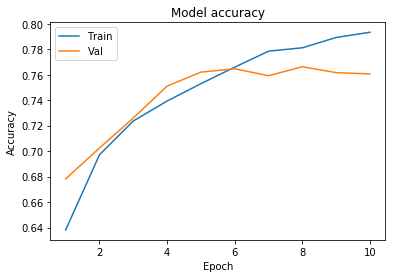

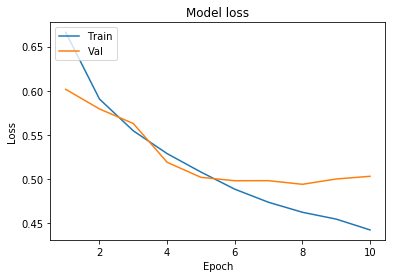

In [28]:
plot_learningCurve(history, 10)